# Start The Program

# Import Library

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Text preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Handling imbalanced datasets
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier

# Model selection and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Machine Learning models
from sklearn.ensemble import (VotingClassifier, StackingClassifier, 
                              RandomForestClassifier, GradientBoostingClassifier, 
                              AdaBoostClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier  # Ensure you have xgboost installed

# Evaluation metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, f1_score, 
                             recall_score, precision_score, 
                             mean_absolute_error, mean_squared_error, 
                             roc_curve, roc_auc_score)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# TensorFlow/Keras models
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (Input, Conv1D, MaxPooling1D, Flatten, 
                                     Dense, Dropout, GlobalAveragePooling1D, 
                                     BatchNormalization, Add, Bidirectional, LSTM, 
                                     Attention)
from tensorflow.keras.utils import to_categorical

# Dataset Load

In [2]:
# Load the CSV file
data = pd.read_csv('/kaggle/input/avped-dataset/AntiVped.csv')

Class 1 data sample

In [3]:
data.head()

,Sequence,molecular \nweight,Theoretical Pi,Extinction \ncoefficient,Half life\n(hours),Instability\n index,Aliphatic\n index,GRAVY,Hydrophobic \nresidue :,Net charge:,Boman Index:\n(Kcal/mol),Protective Antigenic\n Score,Allergenicity,property = 1
0,GKPRPYSPRPTSHPRPIRV,2198.56,12.01,1490.0,30.0,41.15,35.79,-1.579,10.0,5.0,3.65,0.5017,no evidence,1
1,ACYCRIPACIAGERRYGTCIYQGRLWAFCC,3448.09,8.68,10345.0,4.4,55.71,65.33,0.3,53.0,3.0,1.07,0.4636,no evidence,1
2,FLFPLITSFLSKVL,1625.03,8.75,NaN,1.1,16.98,160.00,1.75,64.0,1.0,-1.61,0.4303,no evidence,1
3,SNDIYFNFQR,1303.40,5.55,1490.0,1.9,-6.03,39.00,-1.05,30.0,0.0,3.51,0.5745,strong evidence,1
4,GLFSVLGAVAKHVLPHVVPVIAEKL,2594.18,8.61,NaN,30.0,25.92,159.60,1.224,60.0,1.5,-1.13,0.4590,no evidence,1


Class 0 data sample

In [4]:
data.tail()

,Sequence,molecular \nweight,Theoretical Pi,Extinction \ncoefficient,Half life\n(hours),Instability\n index,Aliphatic\n index,GRAVY,Hydrophobic \nresidue :,Net charge:,Boman Index:\n(Kcal/mol),Protective Antigenic\n Score,Allergenicity,property = 1
3881,LTKYALVAVIVLCLTVLGFTLLAGDSLCEFTVKERNIEFRAVLAYEPKK,5460.56,8.00,3105.0,5.5,43.01,133.27,0.747,55.0,1.00,0.15,1.1777,no evidence,0
3882,SNTFVAVEFSWLYAISLILPCETIRVAWAPKRAYHGTSEEKRRLAPADI,5578.43,7.91,13980.0,1.9,65.50,95.71,0.033,47.0,1.25,1.27,-0.0513,no evidence,0
3883,AVPKRRKSRSNTRHRRSQWKAAAPDLVPIVVDGERRLVPRPLVRYFQQG,5749.68,12.01,6990.0,4.4,92.14,75.51,-0.967,33.0,10.25,3.52,0.9008,no evidence,0
3884,IDHRCGREATPPGKLCNDGRCCSQWGWCGTTQAYCSGKCQSQCDCNRDL,5413.04,7.68,12990.0,20.0,23.34,27.96,-0.867,33.0,1.25,2.66,1.1166,no evidence,0
3885,HLRNHFGSKPFKCNKCNYACVNKSMLNSHMKSHTNVYQYRCADCTY...,5907.77,9.43,7700.0,3.5,33.52,33.20,-0.874,32.0,8.00,2.33,0.7596,no evidence,0


# Pre-processing

In [5]:
data.shape

(3886, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0    Sequence                    3886 non-null   object 
 1   molecular 
weight            3881 non-null   float64
 2   Theoretical Pi               3881 non-null   float64
 3   Extinction 
coefficient      2896 non-null   float64
 4   Half life
(hours)            3881 non-null   float64
 5   Instability
 index           3881 non-null   float64
 6   Aliphatic
 index             3881 non-null   float64
 7   GRAVY                        3879 non-null   object 
 8   Hydrophobic 
residue :       3771 non-null   float64
 9   Net charge:                  3771 non-null   float64
 10  Boman Index:
(Kcal/mol)      3770 non-null   float64
 11  Protective Antigenic
 Score  3867 non-null   float64
 12  Allergenicity                3884 non-null   object 
 13  property = 1      

In [7]:
data.isnull().sum()

 Sequence                         0
molecular \nweight                5
Theoretical Pi                    5
Extinction \ncoefficient        990
Half life\n(hours)                5
Instability\n index               5
Aliphatic\n index                 5
GRAVY                             7
Hydrophobic \nresidue :         115
Net charge:                     115
Boman Index:\n(Kcal/mol)        116
Protective Antigenic\n Score     19
Allergenicity                     2
property = 1                      0
dtype: int64

# For Machine Learning Algorithm

In [8]:
# Convert non-numeric values to NaN for numeric columns
numeric_columns = ['molecular \nweight', 'Theoretical Pi', 'Extinction \ncoefficient', 
                   'Half life\n(hours)', 'Instability\n index', 'Aliphatic\n index', 
                   'GRAVY', 'Hydrophobic \nresidue :', 'Net charge:', 
                   'Boman Index:\n(Kcal/mol)', 'Protective Antigenic\n Score']

data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Fill missing values for numerical columns with their mean
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Fill missing values for the categorical column 'Allergenicity' with the most frequent value
data['Allergenicity'] = data['Allergenicity'].fillna(data['Allergenicity'].mode()[0])

# Clean up the column names
data.columns = data.columns.str.replace('\n', '').str.strip()

# Encode the 'Allergenicity' column using LabelEncoder
label_encoder = LabelEncoder()
data['Allergenicity'] = label_encoder.fit_transform(data['Allergenicity'])

# Get unique amino acids in the dataset and create encoding
all_amino_acids = set(''.join(data['Sequence'].tolist()))
amino_acid_to_index = {amino_acid: i for i, amino_acid in enumerate(all_amino_acids)}

# Preprocess sequence data
sequences_encoded = []
for sequence in data['Sequence']:
    encoded_sequence = [amino_acid_to_index[amino_acid] for amino_acid in sequence]
    sequences_encoded.append(encoded_sequence)

# Pad the sequences
max_sequence_length = max(len(seq) for seq in sequences_encoded)
sequences_padded = pad_sequences(sequences_encoded, maxlen=max_sequence_length, padding='post')
data['Sequence_Encoded'] = sequences_padded.tolist()

# Ensure the correct target column name here
y = data['property = 1']  # Replace with the actual name of the target column

# Select the features for X
X = data[['Sequence_Encoded', 'molecular weight', 'Extinction coefficient', 'Theoretical Pi', 
          'Half life(hours)', 'Instability index', 'Aliphatic index', 'GRAVY', 
          'Hydrophobic residue :', 'Net charge:', 'Boman Index:(Kcal/mol)', 
          'Protective Antigenic Score', 'Allergenicity']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert sequence data to numpy arrays
X_train_sequences = np.array(X_train['Sequence_Encoded'].tolist())
X_test_sequences = np.array(X_test['Sequence_Encoded'].tolist())

# Flatten the sequence data
X_train_sequences_flat = X_train_sequences.reshape(X_train_sequences.shape[0], -1)
X_test_sequences_flat = X_test_sequences.reshape(X_test_sequences.shape[0], -1)

# Combine the flattened sequence data with other features
X_train_combined = np.hstack((X_train_sequences_flat, X_train.drop(columns=['Sequence_Encoded']).values))
X_test_combined = np.hstack((X_test_sequences_flat, X_test.drop(columns=['Sequence_Encoded']).values))

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_combined, y_train)

# Data Distribution

property = 1
1    2082
0    1804
Name: count, dtype: int64


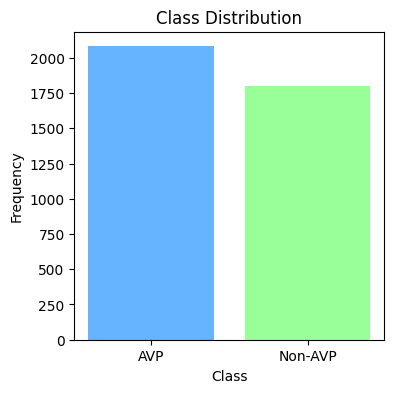

In [9]:
class_counts = data['property = 1'].value_counts()

print(class_counts)

beingsaved = plt.figure(figsize=(4, 4))
colors = ['#66b3ff', '#99ff99']
plt.bar(['AVP', 'Non-AVP'], class_counts.values, color=colors)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
beingsaved.savefig('/kaggle/working/Class_Distribution.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

Data Distribution before SMOTE for tarin set

property = 1
1    1649
0    1459
Name: count, dtype: int64


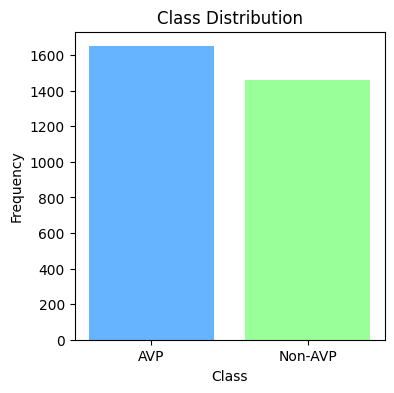

In [10]:
class_counts = y_train.value_counts()

print(class_counts)

beingsaved = plt.figure(figsize=(4, 4))
colors = ['#66b3ff', '#99ff99']
plt.bar(['AVP', 'Non-AVP'], class_counts.values, color=colors)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
beingsaved.savefig('/kaggle/working/Class_Distribution.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

Data Distribution After SMOTE for tarin set

property = 1
1    1649
0    1649
Name: count, dtype: int64


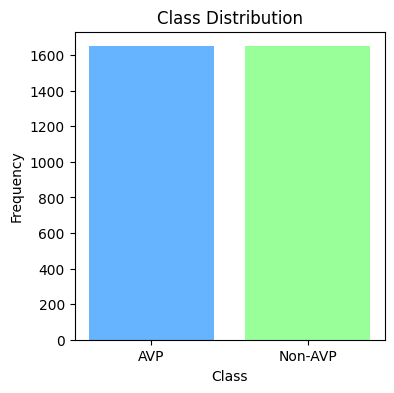

In [11]:
class_counts =  y_train_balanced.value_counts()

print(class_counts)

beingsaved = plt.figure(figsize=(4, 4))
colors = ['#66b3ff', '#99ff99']
plt.bar(['AVP', 'Non-AVP'], class_counts.values, color=colors)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
beingsaved.savefig('/kaggle/working/Class_Distribution.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

# Model Creation

In [12]:
# New ensemble classifiers
ensemble1 = VotingClassifier(estimators=[
    ('gb',GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=10, 
                                       min_samples_split=2, min_samples_leaf=1, 
                                       random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=2, 
                                   min_samples_leaf=1, max_features='sqrt', 
                                   random_state=42)),
    ('et', KNeighborsClassifier(
    n_neighbors=5,         # Number of neighbors to use for knearest neighbors
    weights='uniform',     # Weight function used in prediction ('uniform' or 'distance')
    algorithm='auto',      # Algorithm used to compute the nearest neighbors ('auto', 'ball_tree', 'kd_tree', 'brute')
    leaf_size=30,          # Leaf size passed to the underlying tree-based algorithms
    metric='minkowski'     # Distance metric to use for the tree (default is Minkowski)             # Seed for reproducibility
)),
    ('ada', AdaBoostClassifier(n_estimators=200, learning_rate=0.1, random_state=42 ))
], voting='soft')

ensemble2 = StackingClassifier(estimators=[
    ('gb', GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=10, 
                                       min_samples_split=2, min_samples_leaf=1, 
                                       random_state=42)),
    ('et', KNeighborsClassifier(
    n_neighbors=5,         # Number of neighbors to use for knearest neighbors
    weights='uniform',     # Weight function used in prediction ('uniform' or 'distance')
    algorithm='auto',      # Algorithm used to compute the nearest neighbors ('auto', 'ball_tree', 'kd_tree', 'brute')
    leaf_size=30,          # Leaf size passed to the underlying tree-based algorithms
    metric='minkowski'     # Distance metric to use for the tree (default is Minkowski)
)),
    ('ada', AdaBoostClassifier(n_estimators=200, learning_rate=0.1, random_state=42 ))
], final_estimator=RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=2, 
                                   min_samples_leaf=1, max_features='sqrt', 
                                   random_state=42))

ensemble3 = VotingClassifier(estimators=[
    ('xgb', XGBClassifier(use_label_encoder=True, eval_metric='logloss', n_estimators=200, 
                           max_depth=10, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8,
                           gamma=0, min_child_weight=1)),
    ('brf', BalancedRandomForestClassifier(
        n_estimators=200, criterion='gini', max_depth=10, 
        min_samples_split=2, min_samples_leaf=1, 
        min_weight_fraction_leaf=0.0, bootstrap=True, 
        oob_score=False, random_state=42, 
        verbose=0, class_weight='balanced', 
        min_impurity_decrease=0.0)),
    ('et', KNeighborsClassifier(
    n_neighbors=5,         # Number of neighbors to use for knearest neighbors
    weights='uniform',     # Weight function used in prediction ('uniform' or 'distance')
    algorithm='auto',      # Algorithm used to compute the nearest neighbors ('auto', 'ball_tree', 'kd_tree', 'brute')
    leaf_size=30,          # Leaf size passed to the underlying tree-based algorithms
    metric='minkowski'     # Distance metric to use for the tree (default is Minkowski)
)),
    ('ada', AdaBoostClassifier(n_estimators=200, learning_rate=0.1, random_state=42 ))
], voting='soft')

ensemble4 = StackingClassifier(estimators=[
    ('xgb', XGBClassifier(use_label_encoder=True, eval_metric='logloss', n_estimators=200, 
                           max_depth=10, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8,
                           gamma=0, min_child_weight=1)),
    ('et', KNeighborsClassifier(
    n_neighbors=5,         # Number of neighbors to use for knearest neighbors
    weights='uniform',     # Weight function used in prediction ('uniform' or 'distance')
    algorithm='auto',      # Algorithm used to compute the nearest neighbors ('auto', 'ball_tree', 'kd_tree', 'brute')
    leaf_size=30,          # Leaf size passed to the underlying tree-based algorithms
    metric='minkowski'     # Distance metric to use for the tree (default is Minkowski)
)),
    ('ada', AdaBoostClassifier(n_estimators=200, learning_rate=0.1, random_state=42 ))
], final_estimator=BalancedRandomForestClassifier(n_estimators=200, criterion='gini', max_depth=10, 
        min_samples_split=2, min_samples_leaf=1, 
        min_weight_fraction_leaf=0.0, bootstrap=True, 
        oob_score=False, random_state=42, 
        verbose=0, class_weight='balanced', 
        min_impurity_decrease=0.0))

# Machine Learning Algorithm

In [13]:
# Add this to your classifiers dictionary
classifiers = {
    'SVM': SVC(probability=True, C=1.0, gamma='scale', 
               shrinking=True, tol=1e-3, cache_size=200, verbose=False, max_iter=-1, 
               decision_function_shape='ovr', break_ties=False),
    
    'Decision Tree': DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=5, 
                                            min_samples_split=2, min_samples_leaf=1),
    
    'Extra Tree': ExtraTreesClassifier(n_estimators=100, max_depth=5), 
    
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=2, 
                                   min_samples_leaf=1, random_state=42),
    
    'Logistic Regression': LogisticRegression(penalty='l2', dual=False, tol=0.0001, 
                                             C=1.0, fit_intercept=True, 
                                             intercept_scaling=1, 
                                             max_iter=100,
                                             verbose=0, warm_start=False),
    
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, max_depth=5, 
                                       min_samples_split=2, min_samples_leaf=1),
    
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5, leaf_size=30),
    
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100,), activation='relu', 
                                    solver='adam', alpha=0.0001, batch_size='auto', 
                                    learning_rate='constant', learning_rate_init=0.001, 
                                    power_t=0.5, max_iter=200, shuffle=True, 
                                    random_state=None, tol=0.0001, 
                                    verbose=False, warm_start=False, 
                                    momentum=0.9, nesterovs_momentum=True, 
                                    early_stopping=False, validation_fraction=0.1, 
                                    beta_1=0.9, beta_2=0.999, epsilon=1e-08),
    
    'Naive Bayes': GaussianNB(priors=None, var_smoothing=1e-09),
    
    'AdaBoost': AdaBoostClassifier(n_estimators=100),
    
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100),
    
    'Balanced RF': BalancedRandomForestClassifier(
        n_estimators=100, random_state=42),
    
    'Proposed Ensemble 1': ensemble1,
    'Proposed Ensemble 2': ensemble2,
    'Proposed Ensemble 3': ensemble3,
    'Proposed Ensemble 4': ensemble4
}

# Result Analysis

Model: SVM
Accuracy: 0.699228791773779
Confusion Matrix:
[[211 134]
 [100 333]]
F1 Score: 0.74
Recall: 0.76905311778291
Precision: 0.7130620985010707
Mean Absolute Error: 0.30077120822622105
Root Mean Squared Error: 0.5484261192049673
ROC AUC Score: 0.6903236603407303
Specificity: 0.6115942028985507
Matthews Correlation Coefficient: 0.38604473885660534


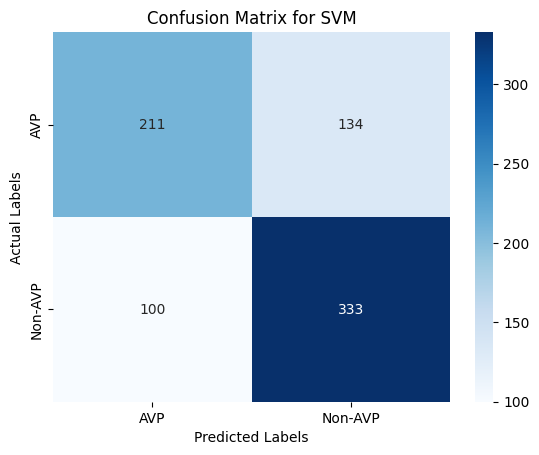

---------------------------------------
Model: Decision Tree
Accuracy: 0.7557840616966581
Confusion Matrix:
[[239 106]
 [ 84 349]]
F1 Score: 0.786036036036036
Recall: 0.8060046189376443
Precision: 0.7670329670329671
Mean Absolute Error: 0.2442159383033419
Root Mean Squared Error: 0.4941820902292412
ROC AUC Score: 0.7493791210630251
Specificity: 0.6927536231884058
Matthews Correlation Coefficient: 0.502847878064558


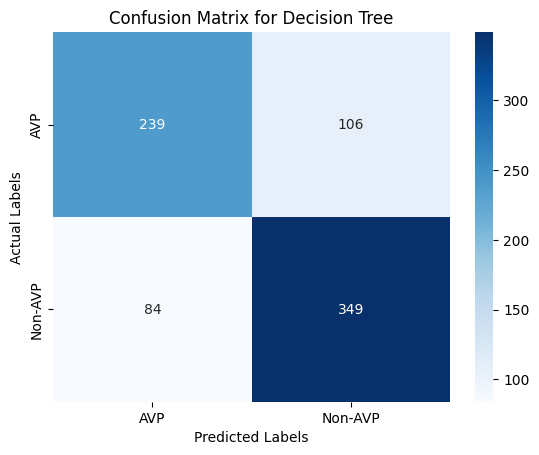

---------------------------------------
Model: Extra Tree
Accuracy: 0.705655526992288
Confusion Matrix:
[[234 111]
 [118 315]]
F1 Score: 0.7334109429569267
Recall: 0.7274826789838337
Precision: 0.7394366197183099
Mean Absolute Error: 0.2943444730077121
Root Mean Squared Error: 0.5425352274347833
ROC AUC Score: 0.7028717742745256
Specificity: 0.6782608695652174
Matthews Correlation Coefficient: 0.4049757212535563


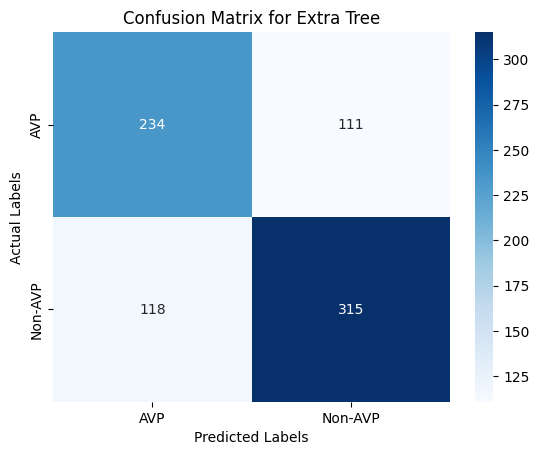

---------------------------------------
Model: Random Forest
Accuracy: 0.7455012853470437
Confusion Matrix:
[[213 132]
 [ 66 367]]
F1 Score: 0.7875536480686696
Recall: 0.8475750577367206
Precision: 0.7354709418837675
Mean Absolute Error: 0.2544987146529563
Root Mean Squared Error: 0.5044786562907854
ROC AUC Score: 0.7324831810422734
Specificity: 0.6173913043478261
Matthews Correlation Coefficient: 0.4816401204456853


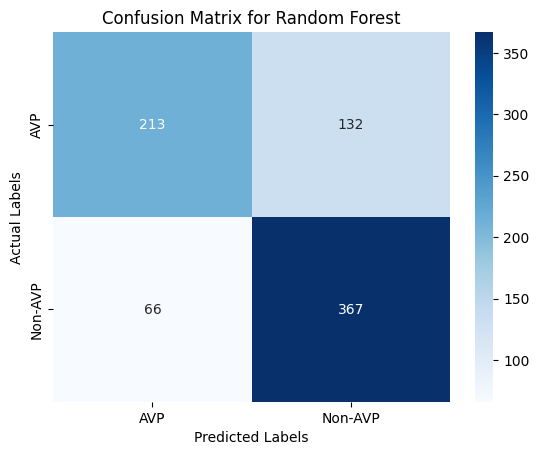

---------------------------------------
Model: Logistic Regression
Accuracy: 0.6709511568123393
Confusion Matrix:
[[217 128]
 [128 305]]
F1 Score: 0.7043879907621247
Recall: 0.7043879907621247
Precision: 0.7043879907621247
Mean Absolute Error: 0.32904884318766064
Root Mean Squared Error: 0.5736277915056598
ROC AUC Score: 0.6666867490042507
Specificity: 0.6289855072463768
Matthews Correlation Coefficient: 0.3333734980085015


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


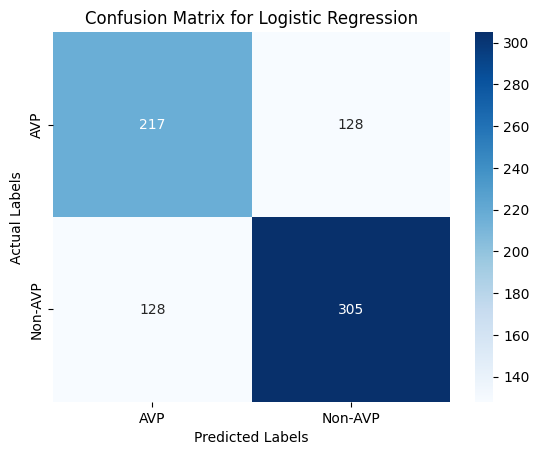

---------------------------------------
Model: Gradient Boosting
Accuracy: 0.8354755784061697
Confusion Matrix:
[[274  71]
 [ 57 376]]
F1 Score: 0.8545454545454546
Recall: 0.8683602771362586
Precision: 0.8411633109619687
Mean Absolute Error: 0.16452442159383032
Root Mean Squared Error: 0.40561610125071507
ROC AUC Score: 0.8312815878434917
Specificity: 0.7942028985507247
Matthews Correlation Coefficient: 0.665752846532746


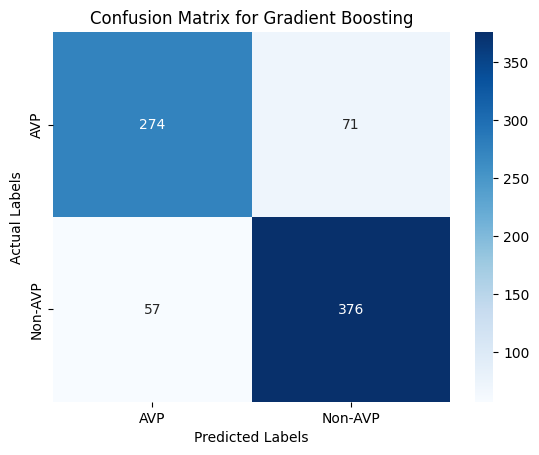

---------------------------------------
Model: K-Nearest Neighbors
Accuracy: 0.7480719794344473
Confusion Matrix:
[[263  82]
 [114 319]]
F1 Score: 0.7649880095923262
Recall: 0.7367205542725174
Precision: 0.7955112219451371
Mean Absolute Error: 0.2519280205655527
Root Mean Squared Error: 0.5019243175674523
ROC AUC Score: 0.7495196974261137
Specificity: 0.7623188405797101
Matthews Correlation Coefficient: 0.4960728571606922


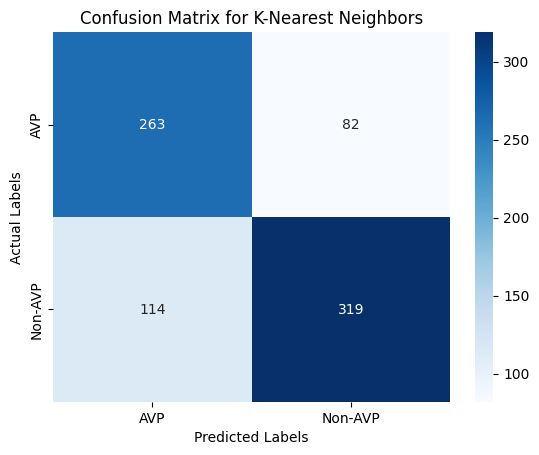

---------------------------------------
Model: Neural Network
Accuracy: 0.7082262210796915
Confusion Matrix:
[[221 124]
 [103 330]]
F1 Score: 0.7440811724915445
Recall: 0.7621247113163973
Precision: 0.7268722466960352
Mean Absolute Error: 0.2917737789203085
Root Mean Squared Error: 0.540160882441804
ROC AUC Score: 0.7013522107306625
Specificity: 0.6405797101449275
Matthews Correlation Coefficient: 0.4058256212137334


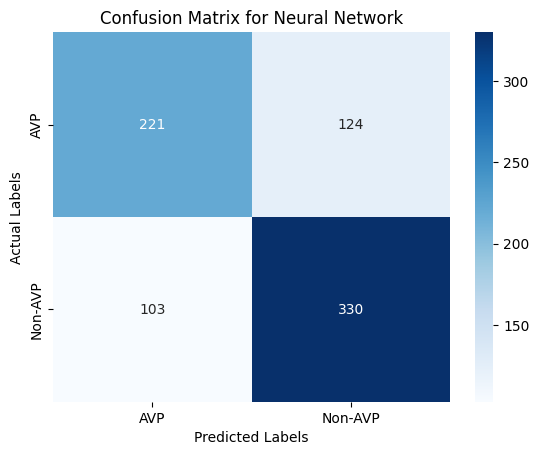

---------------------------------------
Model: Naive Bayes
Accuracy: 0.6580976863753213
Confusion Matrix:
[[160 185]
 [ 81 352]]
F1 Score: 0.7257731958762886
Recall: 0.812933025404157
Precision: 0.6554934823091247
Mean Absolute Error: 0.34190231362467866
Root Mean Squared Error: 0.5847241346350248
ROC AUC Score: 0.638350570673093
Specificity: 0.463768115942029
Matthews Correlation Coefficient: 0.2972821150140373


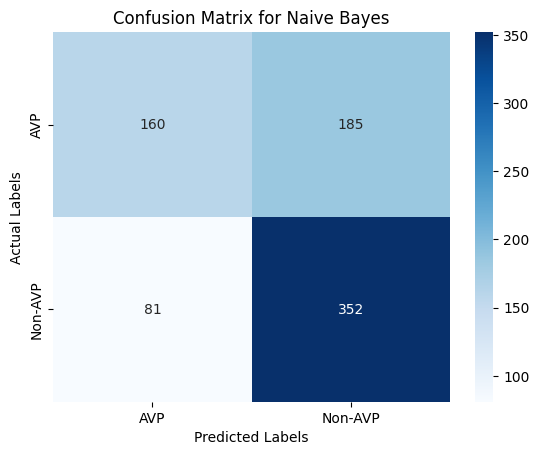

---------------------------------------
Model: AdaBoost
Accuracy: 0.7802056555269923
Confusion Matrix:
[[271  74]
 [ 97 336]]
F1 Score: 0.797153024911032
Recall: 0.7759815242494227
Precision: 0.8195121951219512
Mean Absolute Error: 0.21979434447300772
Root Mean Squared Error: 0.46882229519617313
ROC AUC Score: 0.7807443853131172
Specificity: 0.7855072463768116
Matthews Correlation Coefficient: 0.5587000794538417


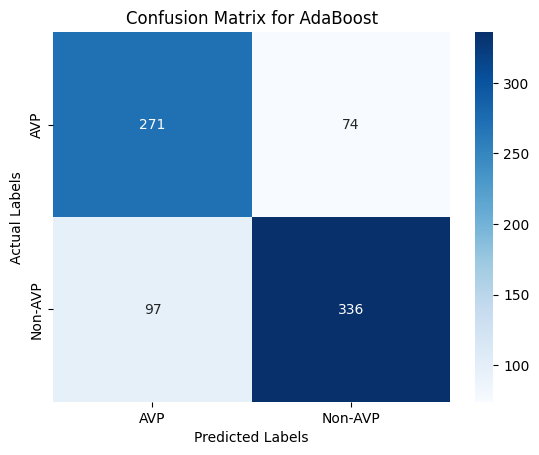

---------------------------------------
Model: XGBoost
Accuracy: 0.8431876606683805
Confusion Matrix:
[[274  71]
 [ 51 382]]
F1 Score: 0.8623024830699773
Recall: 0.8822170900692841
Precision: 0.8432671081677704
Mean Absolute Error: 0.15681233933161953
Root Mean Squared Error: 0.39599537791698974
ROC AUC Score: 0.8382099943100044
Specificity: 0.7942028985507247
Matthews Correlation Coefficient: 0.6813639422540251


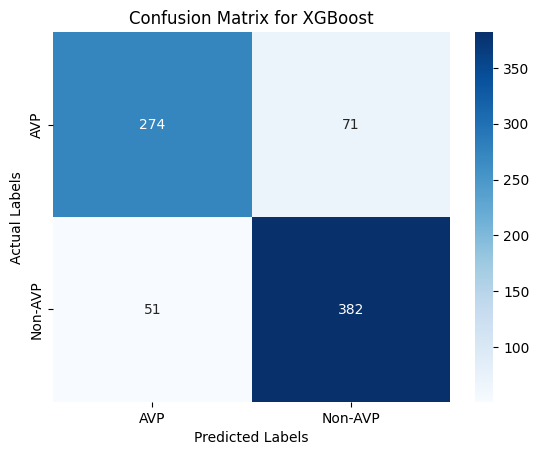

---------------------------------------
Model: Balanced RF


/opt/conda/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/opt/conda/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/opt/conda/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


Accuracy: 0.8419023136246787
Confusion Matrix:
[[273  72]
 [ 51 382]]
F1 Score: 0.8613303269447576
Recall: 0.8822170900692841
Precision: 0.8414096916299559
Mean Absolute Error: 0.15809768637532134
Root Mean Squared Error: 0.3976149976740331
ROC AUC Score: 0.8367607189476854
Specificity: 0.7913043478260869
Matthews Correlation Coefficient: 0.6787416312510152


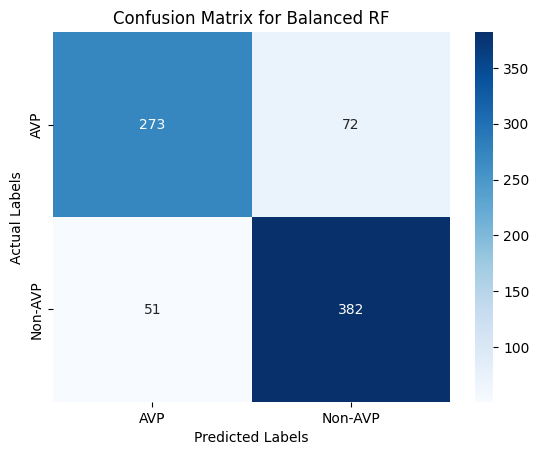

---------------------------------------
Model: Proposed Ensemble 1
Accuracy: 0.8624678663239075
Confusion Matrix:
[[280  65]
 [ 42 391]]
F1 Score: 0.8796400449943756
Recall: 0.9030023094688222
Precision: 0.8574561403508771
Mean Absolute Error: 0.13753213367609254
Root Mean Squared Error: 0.3708532508635896
ROC AUC Score: 0.8572982561836866
Specificity: 0.8115942028985508
Matthews Correlation Coefficient: 0.7207821631111268


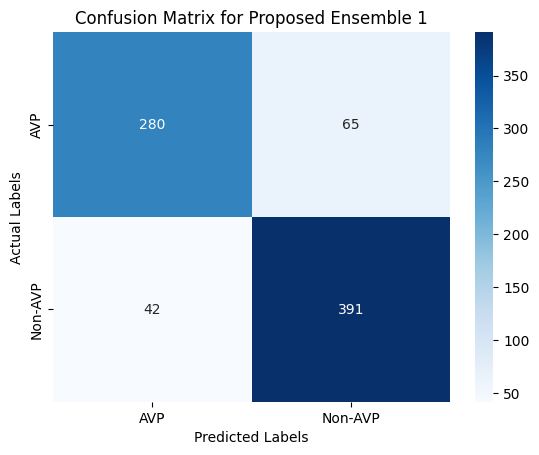

---------------------------------------
Model: Proposed Ensemble 2
Accuracy: 0.8611825192802056
Confusion Matrix:
[[289  56]
 [ 52 381]]
F1 Score: 0.8758620689655172
Recall: 0.8799076212471132
Precision: 0.8718535469107551
Mean Absolute Error: 0.13881748071979436
Root Mean Squared Error: 0.3725821798204986
ROC AUC Score: 0.8587943903337015
Specificity: 0.8376811594202899
Matthews Correlation Coefficient: 0.7184742831245072


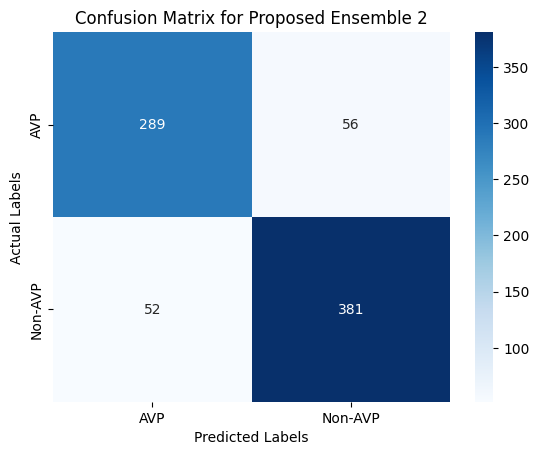

---------------------------------------
Model: Proposed Ensemble 3


/opt/conda/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/opt/conda/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


Accuracy: 0.8483290488431876
Confusion Matrix:
[[277  68]
 [ 50 383]]
F1 Score: 0.8665158371040723
Recall: 0.8845265588914549
Precision: 0.8492239467849224
Mean Absolute Error: 0.15167095115681234
Root Mean Squared Error: 0.3894495489236216
ROC AUC Score: 0.8437125548080463
Specificity: 0.8028985507246377
Matthews Correlation Coefficient: 0.6918576383023118


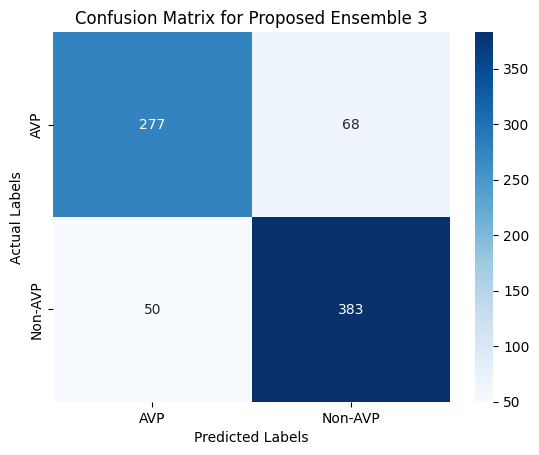

---------------------------------------
Model: Proposed Ensemble 4


/opt/conda/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/opt/conda/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


Accuracy: 0.8560411311053985
Confusion Matrix:
[[291  54]
 [ 58 375]]
F1 Score: 0.8700696055684456
Recall: 0.8660508083140878
Precision: 0.8741258741258742
Mean Absolute Error: 0.14395886889460155
Root Mean Squared Error: 0.37941912035979625
ROC AUC Score: 0.8547645345918264
Specificity: 0.8434782608695652
Matthews Correlation Coefficient: 0.7087324686021995


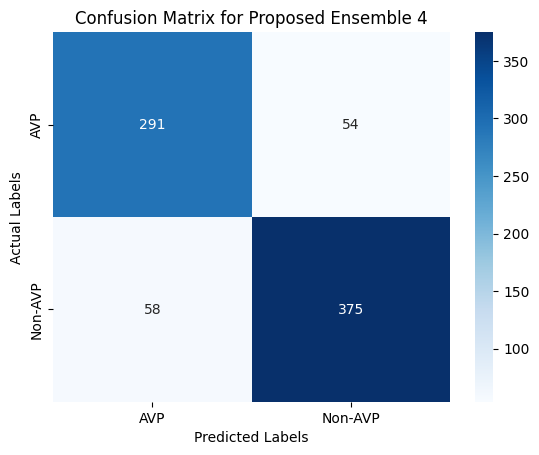

---------------------------------------


In [14]:
# Initialize lists for ROC data
roc_data = {}

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    print(f"Model: {name}")
    
    classifier.fit(X_train_balanced, y_train_balanced)
    y_pred = classifier.predict(X_test_combined)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix:\n{cm}")

    # Calculate F1 score, precision, recall, etc.
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Calculate Specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    # Calculate Matthews Correlation Coefficient
    mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5 if (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn) > 0 else 0

    print(f"F1 Score: {f1}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"ROC AUC Score: {roc_auc}")
    print(f"Specificity: {specificity}")
    print(f"Matthews Correlation Coefficient: {mcc}")

    # Create and save a heatmap of the confusion matrix
    plt.figure()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
                xticklabels=["AVP", "Non-AVP"], yticklabels=["AVP", "Non-AVP"])
    plt.xlabel("Predicted Labels")
    plt.ylabel("Actual Labels")
    plt.title(f"Confusion Matrix for {name}")
    
    # Save the confusion matrix as an image file
    plt.savefig(f'Confusion_{name}.png', format='png', dpi=600, bbox_inches="tight")
    plt.show()  # Close the plot to avoid display

    # Store ROC curve data
    y_prob = classifier.predict_proba(X_test_combined)[:, 1]  # Probability estimates for the positive class
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    
    # Ensure ROC curve starts at (0, 0)
    fpr = np.concatenate([[0], fpr])  # Add 0 at the start
    tpr = np.concatenate([[0], tpr])  # Add 0 at the start
    roc_data[name] = (fpr, tpr, roc_auc)

    print("---------------------------------------")

# Li et al. 2020 (DeepAVP)

Epoch 1/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.6146 - loss: 0.8496 - val_accuracy: 0.6596 - val_loss: 0.6239
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.6773 - loss: 0.6161 - val_accuracy: 0.6626 - val_loss: 0.6185
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7018 - loss: 0.5949 - val_accuracy: 0.6667 - val_loss: 0.6151
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.6955 - loss: 0.5727 - val_accuracy: 0.6798 - val_loss: 0.5930
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7092 - loss: 0.5661 - val_accuracy: 0.6859 - val_loss: 0.5621
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7032 - loss: 0.5609 - val_accuracy: 0.7010 - val_loss: 0.5562
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.7340 - loss: 0.5235 - val_accuracy: 0.7010 - val_loss: 0.5550
Epoch 8/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.7403 - loss: 0.4974 - val_accuracy: 0.

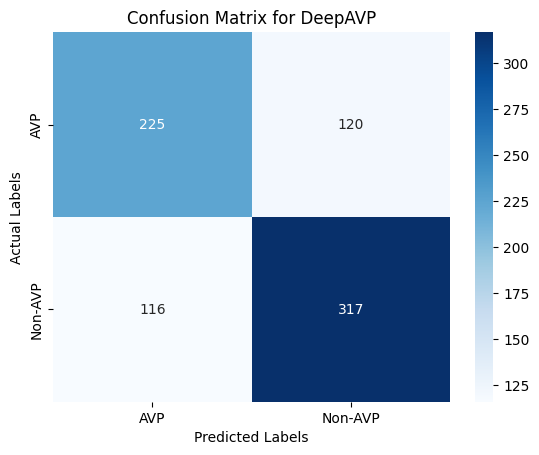

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Conv1D, Flatten, Concatenate
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (f1_score, recall_score, precision_score, 
                             mean_absolute_error, mean_squared_error, 
                             roc_auc_score, confusion_matrix, roc_curve, accuracy_score)
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('/kaggle/input/avped-dataset/AntiVped.csv')

# Data preprocessing
numeric_columns = ['molecular \nweight', 'Theoretical Pi', 'Extinction \ncoefficient', 
                   'Half life\n(hours)', 'Instability\n index', 'Aliphatic\n index', 
                   'GRAVY', 'Hydrophobic \nresidue :', 'Net charge:', 
                   'Boman Index:\n(Kcal/mol)', 'Protective Antigenic\n Score']

data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())
data['Allergenicity'] = data['Allergenicity'].fillna(data['Allergenicity'].mode()[0])
data.columns = data.columns.str.replace('\n', '').str.strip()

label_encoder = LabelEncoder()
data['Allergenicity'] = label_encoder.fit_transform(data['Allergenicity'])

# Encode sequences
all_amino_acids = set(''.join(data['Sequence'].tolist()))
amino_acid_to_index = {amino_acid: i for i, amino_acid in enumerate(all_amino_acids)}

sequences_encoded = []
for sequence in data['Sequence']:
    encoded_sequence = [amino_acid_to_index[amino_acid] for amino_acid in sequence]
    sequences_encoded.append(encoded_sequence)

# Pad the sequences
max_sequence_length = max(len(seq) for seq in sequences_encoded)
sequences_padded = pad_sequences(sequences_encoded, maxlen=max_sequence_length, padding='post')
data['Sequence_Encoded'] = sequences_padded.tolist()

# Define target and features
y = data['property = 1']  # Replace with the actual name of the target column
X = data[['Sequence_Encoded', 'molecular weight', 'Extinction coefficient', 'Theoretical Pi', 
          'Half life(hours)', 'Instability index', 'Aliphatic index', 'GRAVY', 
          'Hydrophobic residue :', 'Net charge:', 'Boman Index:(Kcal/mol)', 
          'Protective Antigenic Score', 'Allergenicity']]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prepare sequence data
X_train_sequences = np.array(X_train['Sequence_Encoded'].tolist())
X_test_sequences = np.array(X_test['Sequence_Encoded'].tolist())

# Reshape for LSTM input
X_train_sequences_reshaped = X_train_sequences.reshape(X_train_sequences.shape[0], max_sequence_length, 1)
X_test_sequences_reshaped = X_test_sequences.reshape(X_test_sequences.shape[0], max_sequence_length, 1)

# Combine additional features
X_train_combined = np.hstack((X_train_sequences.reshape(X_train_sequences.shape[0], -1), 
                               X_train.drop(columns=['Sequence_Encoded']).values))
X_test_combined = np.hstack((X_test_sequences.reshape(X_test_sequences.shape[0], -1), 
                              X_test.drop(columns=['Sequence_Encoded']).values))

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_combined, y_train)

# Reshape the sequence data for LSTM input
X_train_balanced_sequences = X_train_balanced[:, :max_sequence_length]  # Sequence part
X_train_balanced_reshaped = X_train_balanced_sequences.reshape(-1, max_sequence_length, 1)

# Convert target variable to categorical
num_classes = len(np.unique(y))
y_train_balanced_categorical = to_categorical(y_train_balanced, num_classes=num_classes)

# Create the model
def build_hybrid_model(input_shape):
    inputs = Input(shape=input_shape)
    
    # LSTM Channel
    lstm_out = LSTM(64)(inputs)
    lstm_out = Dropout(0.5)(lstm_out)
    
    # CNN Channel
    conv_out = Conv1D(32, kernel_size=3, activation='relu')(inputs)
    conv_out = Dropout(0.5)(conv_out)
    conv_out = Flatten()(conv_out)
    
    # Concatenate both channels
    combined = Concatenate()([lstm_out, conv_out])
    dense_out = Dense(64, activation='relu')(combined)
    output = Dense(num_classes, activation='softmax' if num_classes > 2 else 'sigmoid')(dense_out)
    
    # Model setup
    model = Model(inputs, output)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy' if num_classes > 2 else 'binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize the model
DeepAVP = build_hybrid_model((max_sequence_length, 1))

# Train the model
DeepAVP.fit(X_train_balanced_reshaped, y_train_balanced_categorical, 
            epochs=100, batch_size=32, validation_split=0.3)

# Evaluate the model
X_test_sequences_reshaped = X_test_sequences.reshape(X_test_sequences.shape[0], max_sequence_length, 1)
y_test_categorical = to_categorical(y_test, num_classes=num_classes)

DeepAVP_loss, DeepAVP_accuracy = DeepAVP.evaluate(X_test_sequences_reshaped, y_test_categorical)
print(f'DeepAVP Accuracy: {DeepAVP_accuracy:.4f}')

# Collect ROC data for the DeepAVP model
y_pred_probs = DeepAVP.predict(X_test_sequences_reshaped)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate metrics
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
roc_auc = roc_auc_score(y_test_categorical, y_pred_probs, multi_class='ovr')
cm = confusion_matrix(y_test, y_pred)

# Calculate specificity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Calculate Matthews Correlation Coefficient
mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5 if (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn) > 0 else 0

# Print metrics
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

# Create and save a heatmap of the confusion matrix
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
            xticklabels=["AVP", "Non-AVP"], yticklabels=["AVP", "Non-AVP"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for DeepAVP")
plt.savefig('Confusion_DeepAVP.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

# Store ROC curve data
fpr, tpr, _ = roc_curve(y_test, y_pred_probs[:, 1])  # Assuming binary classification
roc_data['DeepAVP'] = (fpr, tpr, roc_auc)

# Singh et al. 2020 (Deep-AVPiden)

Epoch 1/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.5312 - loss: 2.5839 - val_accuracy: 0.6404 - val_loss: 0.6795
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5879 - loss: 0.7925 - val_accuracy: 0.6646 - val_loss: 0.6328
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6173 - loss: 0.6541 - val_accuracy: 0.6242 - val_loss: 0.6575
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6502 - loss: 0.6391 - val_accuracy: 0.6242 - val_loss: 0.6510
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6397 - loss: 0.6409 - val_accuracy: 0.6192 - val_loss: 0.6830
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6261 - loss: 0.6464 - val_accuracy: 0.6657 - val_loss: 0.6339
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6458 - loss: 0.6387 - val_accuracy: 0.6283 - val_loss: 0.6479
Epoch 8/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6631 - loss: 0.6215 - val_accuracy: 0.

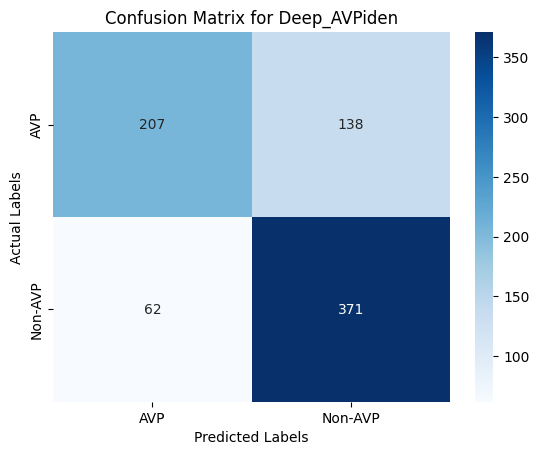

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, Dense, Dropout, Add, BatchNormalization, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (f1_score, recall_score, precision_score, 
                             mean_absolute_error, mean_squared_error, 
                             roc_auc_score, confusion_matrix, roc_curve, accuracy_score)
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('/kaggle/input/avped-dataset/AntiVped.csv')

# Data preprocessing
numeric_columns = ['molecular \nweight', 'Theoretical Pi', 'Extinction \ncoefficient', 
                   'Half life\n(hours)', 'Instability\n index', 'Aliphatic\n index', 
                   'GRAVY', 'Hydrophobic \nresidue :', 'Net charge:', 
                   'Boman Index:\n(Kcal/mol)', 'Protective Antigenic\n Score']

data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Fill missing values
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())
data['Allergenicity'] = data['Allergenicity'].fillna(data['Allergenicity'].mode()[0])

data.columns = data.columns.str.replace('\n', '').str.strip()

label_encoder = LabelEncoder()
data['Allergenicity'] = label_encoder.fit_transform(data['Allergenicity'])

# Encode sequences
all_amino_acids = set(''.join(data['Sequence'].tolist()))
amino_acid_to_index = {amino_acid: i for i, amino_acid in enumerate(all_amino_acids)}

sequences_encoded = []
for sequence in data['Sequence']:
    encoded_sequence = [amino_acid_to_index[amino_acid] for amino_acid in sequence]
    sequences_encoded.append(encoded_sequence)

# Pad the sequences
max_sequence_length = max(len(seq) for seq in sequences_encoded)
sequences_padded = pad_sequences(sequences_encoded, maxlen=max_sequence_length, padding='post')
data['Sequence_Encoded'] = sequences_padded.tolist()

# Ensure the correct target column name here
y = data['property = 1']  # Adjust this line as needed

# Select features
X = data[['Sequence_Encoded', 'molecular weight', 'Extinction coefficient', 'Theoretical Pi', 
          'Half life(hours)', 'Instability index', 'Aliphatic index', 'GRAVY', 
          'Hydrophobic residue :', 'Net charge:', 'Boman Index:(Kcal/mol)', 
          'Protective Antigenic Score', 'Allergenicity']]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert sequence data to numpy arrays
X_train_sequences = np.array(X_train['Sequence_Encoded'].tolist())
X_test_sequences = np.array(X_test['Sequence_Encoded'].tolist())

# Reshape to fit input shape
X_train_sequences_reshaped = X_train_sequences.reshape(X_train_sequences.shape[0], max_sequence_length, 1)
X_test_sequences_reshaped = X_test_sequences.reshape(X_test_sequences.shape[0], max_sequence_length, 1)

# Combine additional features
X_train_combined = np.hstack((X_train_sequences.reshape(X_train_sequences.shape[0], -1), 
                               X_train.drop(columns=['Sequence_Encoded']).values))
X_test_combined = np.hstack((X_test_sequences.reshape(X_test_sequences.shape[0], -1), 
                              X_test.drop(columns=['Sequence_Encoded']).values))

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_combined, y_train)

# Split the balanced dataset back to sequence and other features
X_train_balanced_sequences = X_train_balanced[:, :max_sequence_length]  # Sequence part

# Reshape the sequence data for TCN input
X_train_balanced_reshaped = X_train_balanced_sequences.reshape(-1, max_sequence_length, 1)

# Define Temporal Convolutional Block
def tcn_block(inputs, filters, kernel_size, dilation_rate):
    x = Conv1D(filters, kernel_size, dilation_rate=dilation_rate, padding="causal", activation="relu")(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Conv1D(filters, kernel_size, dilation_rate=dilation_rate, padding="causal", activation="relu")(x)
    x = BatchNormalization()(x)
    return Add()([inputs, x])  # Residual connection

# Build Model
def build_model(input_shape):
    inputs = Input(shape=input_shape)
    x = tcn_block(inputs, filters=32, kernel_size=3, dilation_rate=1)
    x = tcn_block(x, filters=32, kernel_size=3, dilation_rate=2)
    x = GlobalAveragePooling1D()(x)
    x = Dense(64, activation="relu")(x)
    x = Dropout(0.5)(x)
    outputs = Dense(1, activation="sigmoid")(x)  # Single output for binary classification
    
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])
    return model

# Build and train the model
Deep_AVPiden = build_model((max_sequence_length, 1))

# Train the model
Deep_AVPiden.fit(X_train_balanced_reshaped, y_train_balanced, 
          epochs=100, batch_size=32, validation_split=0.3)

# Evaluate the model
X_test_sequences_reshaped = X_test_sequences.reshape(X_test_sequences.shape[0], max_sequence_length, 1)
Deep_AVPiden_loss, Deep_AVPiden_accuracy = Deep_AVPiden.evaluate(X_test_sequences_reshaped, y_test)
print(f'Deep_AVPiden Accuracy: {Deep_AVPiden_accuracy:.4f}')

# Collect ROC data for the Deep_AVPiden model
y_pred_probs = Deep_AVPiden.predict(X_test_sequences_reshaped)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # Binarize predictions

# Calculate metrics
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
roc_auc = roc_auc_score(y_test, y_pred_probs)  # For binary classification
cm = confusion_matrix(y_test, y_pred)

# Calculate specificity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Calculate Matthews Correlation Coefficient
mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5 if (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn) > 0 else 0

# Print metrics
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

# Create and save a heatmap of the confusion matrix
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
            xticklabels=["AVP", "Non-AVP"], yticklabels=["AVP", "Non-AVP"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for Deep_AVPiden")
plt.savefig('Confusion_Deep_AVPiden.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

# Store ROC curve data
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)  # Assuming binary classification
roc_data['Deep_AVPiden'] = (fpr, tpr, roc_auc)

# Sharma et al. 2021 (Deep_AVPpred)

Epoch 1/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.6277 - loss: 0.7163 - val_accuracy: 0.6864 - val_loss: 0.6137
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6640 - loss: 0.6223 - val_accuracy: 0.6879 - val_loss: 0.6153
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6644 - loss: 0.6084 - val_accuracy: 0.4970 - val_loss: 0.7084
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7068 - loss: 0.5763 - val_accuracy: 0.7015 - val_loss: 0.5754
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7023 - loss: 0.5821 - val_accuracy: 0.7030 - val_loss: 0.5473
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7071 - loss: 0.5579 - val_accuracy: 0.4970 - val_loss: 0.8497
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7186 - loss: 0.5481 - val_accuracy: 0.4591 - val_loss: 0.8212
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7265 - loss: 0.5312 - val_accuracy: 0.

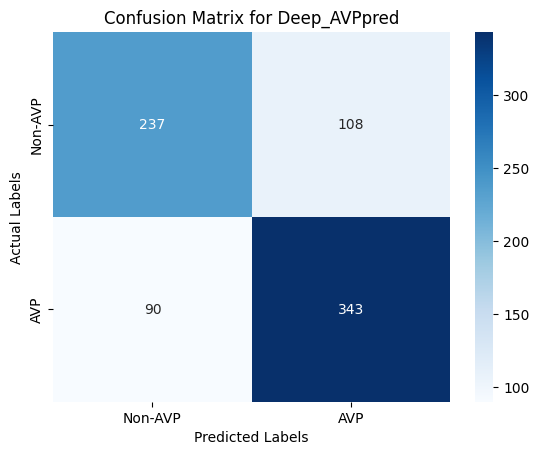

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, GlobalAveragePooling1D, Input, BatchNormalization, Add
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (f1_score, recall_score, precision_score, 
                             mean_absolute_error, mean_squared_error, 
                             roc_auc_score, confusion_matrix, roc_curve)
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('/kaggle/input/avped-dataset/AntiVped.csv')

# Data preprocessing
numeric_columns = ['molecular \nweight', 'Theoretical Pi', 'Extinction \ncoefficient', 
                   'Half life\n(hours)', 'Instability\n index', 'Aliphatic\n index', 
                   'GRAVY', 'Hydrophobic \nresidue :', 'Net charge:', 
                   'Boman Index:\n(Kcal/mol)', 'Protective Antigenic\n Score']

data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Fill missing values
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())
data['Allergenicity'] = data['Allergenicity'].fillna(data['Allergenicity'].mode()[0])

data.columns = data.columns.str.replace('\n', '').str.strip()

label_encoder = LabelEncoder()
data['Allergenicity'] = label_encoder.fit_transform(data['Allergenicity'])

# Encode sequences
all_amino_acids = set(''.join(data['Sequence'].tolist()))
amino_acid_to_index = {amino_acid: i for i, amino_acid in enumerate(all_amino_acids)}

sequences_encoded = []
for sequence in data['Sequence']:
    encoded_sequence = [amino_acid_to_index[amino_acid] for amino_acid in sequence]
    sequences_encoded.append(encoded_sequence)

# Pad the sequences
max_sequence_length = max(len(seq) for seq in sequences_encoded)
sequences_padded = pad_sequences(sequences_encoded, maxlen=max_sequence_length, padding='post')
data['Sequence_Encoded'] = sequences_padded.tolist()

# Ensure the correct target column name here
y = data['property = 1']  # Adjust based on your dataset

# Select features
X = data[['Sequence_Encoded', 'molecular weight', 'Extinction coefficient', 'Theoretical Pi', 
          'Half life(hours)', 'Instability index', 'Aliphatic index', 'GRAVY', 
          'Hydrophobic residue :', 'Net charge:', 'Boman Index:(Kcal/mol)', 
          'Protective Antigenic Score', 'Allergenicity']]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert sequence data to numpy arrays
X_train_sequences = np.array(X_train['Sequence_Encoded'].tolist())
X_test_sequences = np.array(X_test['Sequence_Encoded'].tolist())

# Flatten the sequence data
X_train_sequences_flat = X_train_sequences.reshape(X_train_sequences.shape[0], -1)
X_test_sequences_flat = X_test_sequences.reshape(X_test_sequences.shape[0], -1)

# Combine the flattened sequence data with other features
X_train_combined = np.hstack((X_train_sequences_flat, X_train.drop(columns=['Sequence_Encoded']).values))
X_test_combined = np.hstack((X_test_sequences_flat, X_test.drop(columns=['Sequence_Encoded']).values))

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_combined, y_train)

# Convert target variable to categorical if it's a classification problem
num_classes = len(np.unique(y))  # Adjust based on your target classes
y_train_balanced_categorical = to_categorical(y_train_balanced, num_classes=num_classes)
y_test_categorical = to_categorical(y_test, num_classes=num_classes)

# Reshape the balanced training data to include only the sequence part
X_train_sequences_balanced = X_train_balanced[:, :max_sequence_length]  # Select only the sequence part
X_test_sequences = X_test_combined[:, :max_sequence_length]  # Same for test

# Reshape to fit the model input shape
X_train_balanced_reshaped = X_train_sequences_balanced.reshape(X_train_sequences_balanced.shape[0], max_sequence_length, 1)
X_test_reshaped = X_test_sequences.reshape(X_test_sequences.shape[0], max_sequence_length, 1)

# Define a ResNet-like architecture for 1D data
def resnet_block(input_tensor, filters):
    # First convolution block
    x = Conv1D(filters, kernel_size=3, padding='same', activation='relu')(input_tensor)
    x = BatchNormalization()(x)
    x = Conv1D(filters, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    
    # Adjust input tensor shape for residual connection
    if input_tensor.shape[-1] != filters:
        input_tensor = Conv1D(filters, kernel_size=1, padding='same')(input_tensor)  # 1x1 convolution to match shapes
        
    return Add()([input_tensor, x])  # Residual connection

# Build the model
inputs = Input(shape=(max_sequence_length, 1))
x = resnet_block(inputs, 64)
x = MaxPooling1D(pool_size=2)(x)
x = resnet_block(x, 128)
x = MaxPooling1D(pool_size=2)(x)
x = GlobalAveragePooling1D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(num_classes, activation='softmax')(x)  # Use 'sigmoid' for binary classification

# Create and compile the model
Deep_AVPpred = Model(inputs=inputs, outputs=outputs)
Deep_AVPpred.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
Deep_AVPpred.fit(X_train_balanced_reshaped, y_train_balanced_categorical, 
          epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
Deep_AVPpred_loss, Deep_AVPpred_accuracy = Deep_AVPpred.evaluate(X_test_reshaped, y_test_categorical)
print(f'Deep_AVPpred Accuracy: {Deep_AVPpred_accuracy:.4f}')

# Collect ROC data for the Deep_AVPpred model
y_pred_probs = Deep_AVPpred.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate metrics
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
roc_auc = roc_auc_score(y_test_categorical, y_pred_probs, multi_class='ovr')
cm = confusion_matrix(y_test, y_pred)

# Calculate specificity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Calculate Matthews Correlation Coefficient
mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5 if (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn) > 0 else 0

# Print metrics
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

# Create and save a heatmap of the confusion matrix
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
            xticklabels=["Non-AVP", "AVP"], yticklabels=["Non-AVP", "AVP"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for Deep_AVPpred")
plt.savefig('Confusion_Deep_AVPpred.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

# Store ROC curve data
fpr, tpr, _ = roc_curve(y_test, y_pred_probs[:, 1])  # Assuming binary classification
roc_data['Deep_AVPpred'] = (fpr, tpr, roc_auc)

# Akbar et al. 2022 (Ensemble_Learner)

XGB Accuracy: 0.8329048843187661
KNN Accuracy: 0.7339331619537275
ETC Accuracy: 0.6838046272493573
SVM Accuracy: 0.7017994858611826
ADA Accuracy: 0.7352185089974294
Generation 0: Best fitness = 0.787917737789203
Generation 1: Best fitness = 0.8329048843187661
Generation 2: Best fitness = 0.8329048843187661
Generation 3: Best fitness = 0.8329048843187661
Generation 4: Best fitness = 0.8329048843187661
Generation 5: Best fitness = 0.8329048843187661
Generation 6: Best fitness = 0.8329048843187661
Generation 7: Best fitness = 0.8329048843187661
Generation 8: Best fitness = 0.8329048843187661
Generation 9: Best fitness = 0.8329048843187661
Generation 10: Best fitness = 0.8329048843187661
Generation 11: Best fitness = 0.8329048843187661
Generation 12: Best fitness = 0.8329048843187661
Generation 13: Best fitness = 0.8329048843187661
Generation 14: Best fitness = 0.8329048843187661
Generation 15: Best fitness = 0.8329048843187661
Generation 16: Best fitness = 0.8329048843187661
Generation 17

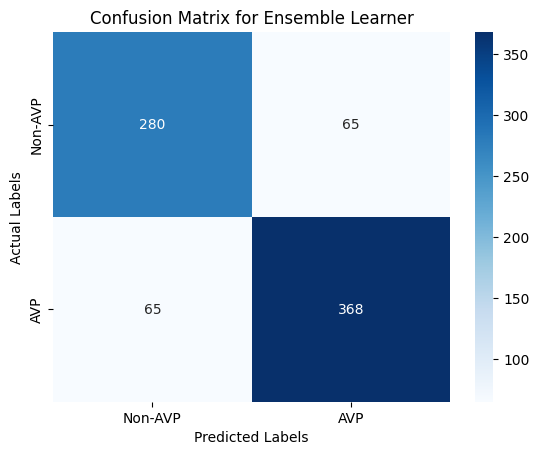

In [18]:
# Data manipulation
import pandas as pd
import numpy as np

# Text preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Handling imbalanced datasets
from imblearn.over_sampling import SMOTE

# Model selection and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Machine Learning models
from sklearn.ensemble import (VotingClassifier, StackingClassifier,
                              RandomForestClassifier, GradientBoostingClassifier,
                              AdaBoostClassifier, ExtraTreesClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier  # Ensure you have xgboost installed

# Evaluation metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, f1_score, 
                             recall_score, precision_score, 
                             mean_absolute_error, mean_squared_error, 
                             roc_curve, roc_auc_score)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
data = pd.read_csv('/kaggle/input/avped-dataset/AntiVped.csv')

# Data preprocessing
numeric_columns = ['molecular \nweight', 'Theoretical Pi', 'Extinction \ncoefficient', 
                   'Half life\n(hours)', 'Instability\n index', 'Aliphatic\n index', 
                   'GRAVY', 'Hydrophobic \nresidue :', 'Net charge:', 
                   'Boman Index:\n(Kcal/mol)', 'Protective Antigenic\n Score']

data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Fill missing values
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())
data['Allergenicity'] = data['Allergenicity'].fillna(data['Allergenicity'].mode()[0])

# Clean up the column names
data.columns = data.columns.str.replace('\n', '').str.strip()

# Encode the 'Allergenicity' column using LabelEncoder
label_encoder = LabelEncoder()
data['Allergenicity'] = label_encoder.fit_transform(data['Allergenicity'])

# Get unique amino acids in the dataset and create encoding
all_amino_acids = set(''.join(data['Sequence'].tolist()))
amino_acid_to_index = {amino_acid: i for i, amino_acid in enumerate(all_amino_acids)}

# Preprocess sequence data
sequences_encoded = []
for sequence in data['Sequence']:
    encoded_sequence = [amino_acid_to_index[amino_acid] for amino_acid in sequence]
    sequences_encoded.append(encoded_sequence)

# Pad the sequences
max_sequence_length = max(len(seq) for seq in sequences_encoded)
sequences_padded = pad_sequences(sequences_encoded, maxlen=max_sequence_length, padding='post')
data['Sequence_Encoded'] = sequences_padded.tolist()

# Ensure the correct target column name here
y = data['property = 1']  # Replace with the actual name of the target column

# Select the features for X
X = data[['molecular weight', 'Extinction coefficient', 'Theoretical Pi', 
          'Half life(hours)', 'Instability index', 'Aliphatic index', 'GRAVY', 
          'Hydrophobic residue :', 'Net charge:', 'Boman Index:(Kcal/mol)', 
          'Protective Antigenic Score', 'Allergenicity']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the padded sequences to a numpy array
X_train_sequences_flat = np.array(sequences_padded[:len(X_train)])
X_test_sequences_flat = np.array(sequences_padded[len(X_train):])

# Combine the flattened sequence data with numeric features
X_train_combined = np.hstack((X_train_sequences_flat, X_train.values))
X_test_combined = np.hstack((X_test_sequences_flat, X_test.values))

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_combined, y_train)

# Initialize classifiers
classifiers = {
    "XGB": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "ETC": ExtraTreesClassifier(n_estimators=100, max_depth=5),
    "SVM": SVC(probability=True),
    "ADA": AdaBoostClassifier(n_estimators=100)
}

# Train classifiers and collect predictions
predictions = []
for name, clf in classifiers.items():
    clf.fit(X_train_balanced, y_train_balanced)  # Use balanced data here
    y_pred = clf.predict(X_test_combined)  # Use combined data here
    predictions.append(y_pred)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred)}")

# Genetic Algorithm (simple ensemble)
# Initialize random population of classifier weights
population_size = 10
num_classifiers = len(classifiers)
num_generations = 50
mutation_rate = 0.1

def initialize_population(size, num_classifiers):
    return np.random.rand(size, num_classifiers)

def fitness(weights, predictions, y_true):
    weighted_preds = np.zeros_like(predictions[0], dtype=float)
    for i in range(num_classifiers):
        weighted_preds += weights[i] * predictions[i]
    final_preds = np.round(weighted_preds / np.sum(weights))  # Final ensemble decision
    return accuracy_score(y_true, final_preds)

def mutate(weights):
    if np.random.rand() < mutation_rate:
        idx = np.random.randint(0, len(weights))
        weights[idx] = np.random.rand()
    return weights

def crossover(parent1, parent2):
    crossover_point = np.random.randint(0, num_classifiers)
    child = np.concatenate([parent1[:crossover_point], parent2[crossover_point:]])
    return child

# Genetic Algorithm Loop
population = initialize_population(population_size, num_classifiers)

for generation in range(num_generations):
    # Evaluate fitness of each individual
    fitness_scores = [fitness(ind, predictions, y_test) for ind in population]
    
    # Select the best individuals (elitism)
    sorted_idx = np.argsort(fitness_scores)[::-1]
    population = [population[i] for i in sorted_idx[:population_size // 2]]
    
    # Crossover and mutation
    for _ in range(population_size // 2):
        parent_indices = np.random.choice(len(population), size=2, replace=False)
        parent1, parent2 = population[parent_indices[0]], population[parent_indices[1]]
        child = mutate(crossover(parent1, parent2))
        population.append(child)
    
    # Best individual
    best_fitness = max(fitness_scores)
    print(f"Generation {generation}: Best fitness = {best_fitness}")

# Use the best weights for final predictions
best_weights = population[np.argmax(fitness_scores)]
weighted_preds = np.zeros_like(predictions[0], dtype=float)
for i in range(num_classifiers):
    weighted_preds += best_weights[i] * predictions[i]

final_preds = np.round(weighted_preds / np.sum(best_weights))
print(f"\n\nEnsemble Learner Accuracy: {accuracy_score(y_test, final_preds)}")

# Collect ROC data for the ensemble model
y_pred_probs = np.zeros((len(y_test), len(classifiers)))  # Collect probabilities for ROC
for i, clf in enumerate(classifiers.values()):
    y_pred_probs[:, i] = clf.predict_proba(X_test_combined)[:, 1]

roc_auc = roc_auc_score(y_test, np.mean(y_pred_probs, axis=1))  # Average probabilities for ROC AUC

# Calculate metrics
f1 = f1_score(y_test, final_preds)
recall = recall_score(y_test, final_preds)
precision = precision_score(y_test, final_preds)
mae = mean_absolute_error(y_test, final_preds)
rmse = mean_squared_error(y_test, final_preds, squared=False)
cm = confusion_matrix(y_test, final_preds)

# Calculate specificity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Calculate Matthews Correlation Coefficient
mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5 if (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn) > 0 else 0

# Print metrics
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

# Create and save a heatmap of the confusion matrix
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
            xticklabels=["Non-AVP", "AVP"], yticklabels=["Non-AVP", "AVP"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for Ensemble Learner")
plt.savefig('Confusion_Ensemble_Learner.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

# Store ROC curve data
fpr, tpr, _ = roc_curve(y_test, np.mean(y_pred_probs, axis=1))  # Assuming binary classification

roc_data['Ensemble_Learner'] = (fpr, tpr, roc_auc)

# Yan et al. 2024 (AntiCVP-Deep)

Epoch 1/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.5362 - loss: 0.7205 - val_accuracy: 0.6167 - val_loss: 0.6489
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.6281 - loss: 0.6415 - val_accuracy: 0.6667 - val_loss: 0.6090
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.6279 - loss: 0.6479 - val_accuracy: 0.6273 - val_loss: 0.6412
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.6656 - loss: 0.6206 - val_accuracy: 0.6545 - val_loss: 0.6053
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.6434 - loss: 0.6352 - val_accuracy: 0.6136 - val_loss: 0.6468
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.6536 - loss: 0.6328 - val_accuracy: 0.5970 - val_loss: 0.6780
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.6501 - loss: 0.6195 - val_accuracy: 0.5894 - val_loss: 0.6928
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.6546 - loss: 0.6278 - val_accuracy: 0.

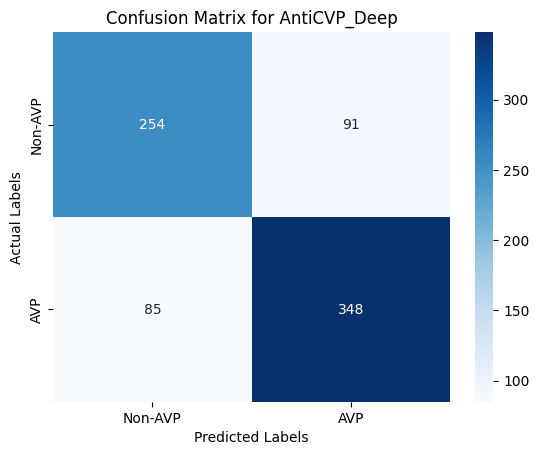

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Bidirectional, LSTM, Dense, Dropout, Attention, GlobalAveragePooling1D
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (confusion_matrix, accuracy_score, f1_score, 
                             recall_score, precision_score, 
                             mean_absolute_error, mean_squared_error, 
                             roc_curve, roc_auc_score)
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
data = pd.read_csv('/kaggle/input/avped-dataset/AntiVped.csv')

# Data preprocessing
numeric_columns = ['molecular \nweight', 'Theoretical Pi', 'Extinction \ncoefficient', 
                   'Half life\n(hours)', 'Instability\n index', 'Aliphatic\n index', 
                   'GRAVY', 'Hydrophobic \nresidue :', 'Net charge:', 
                   'Boman Index:\n(Kcal/mol)', 'Protective Antigenic\n Score']

data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())
data['Allergenicity'] = data['Allergenicity'].fillna(data['Allergenicity'].mode()[0])
data.columns = data.columns.str.replace('\n', '').str.strip()

# Encode the 'Allergenicity' column
label_encoder = LabelEncoder()
data['Allergenicity'] = label_encoder.fit_transform(data['Allergenicity'])

# Prepare sequence data
all_amino_acids = set(''.join(data['Sequence'].tolist()))
amino_acid_to_index = {amino_acid: i for i, amino_acid in enumerate(all_amino_acids)}
sequences_encoded = [[amino_acid_to_index[amino_acid] for amino_acid in sequence] for sequence in data['Sequence']]
max_sequence_length = max(len(seq) for seq in sequences_encoded)
sequences_padded = pad_sequences(sequences_encoded, maxlen=max_sequence_length, padding='post')

# Prepare target variable
y = data['property = 1']  # Replace with the actual name of the target column
X = data[['molecular weight', 'Extinction coefficient', 'Theoretical Pi', 
          'Half life(hours)', 'Instability index', 'Aliphatic index', 'GRAVY', 
          'Hydrophobic residue :', 'Net charge:', 'Boman Index:(Kcal/mol)', 
          'Protective Antigenic Score', 'Allergenicity']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_sequences = sequences_padded[X_train.index]
X_test_sequences = sequences_padded[X_test.index]

# Reshape for LSTM
X_train_reshaped = X_train_sequences.reshape(X_train_sequences.shape[0], max_sequence_length, 1)
X_test_reshaped = X_test_sequences.reshape(X_test_sequences.shape[0], max_sequence_length, 1)

# Combine numerical features with sequence data for SMOTE
X_train_combined = np.hstack((X_train.values, X_train_sequences))
X_test_combined = np.hstack((X_test.values, X_test_sequences))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_combined, y_train)

# Convert target variable to categorical
num_classes = len(np.unique(y))
y_train_balanced_categorical = to_categorical(y_train_balanced, num_classes=num_classes)
y_test_categorical = to_categorical(y_test, num_classes=num_classes)

# Final reshape for the LSTM
X_train_sequences_balanced = X_train_balanced[:, :max_sequence_length].reshape(-1, max_sequence_length, 1)
X_test_sequences = X_test_combined[:, :max_sequence_length].reshape(-1, max_sequence_length, 1)

# Define the model
def create_anticvp_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Bidirectional(LSTM(64, return_sequences=True))(inputs)
    attention = Attention()([x, x])
    x = GlobalAveragePooling1D()(attention)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create and compile the model
AntiCVP_Deep = create_anticvp_model((max_sequence_length, 1))

# Train the model
AntiCVP_Deep.fit(X_train_sequences_balanced, y_train_balanced_categorical, 
                 epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
AntiCVP_Deep_loss, AntiCVP_Deep_accuracy = AntiCVP_Deep.evaluate(X_test_sequences, y_test_categorical)
print(f'AntiCVP_Deep Accuracy: {AntiCVP_Deep_accuracy:.4f}')

# Predictions for evaluation metrics
y_pred_probs = AntiCVP_Deep.predict(X_test_sequences)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate metrics
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
roc_auc = roc_auc_score(y_test_categorical, y_pred_probs, multi_class='ovr')
cm = confusion_matrix(y_test, y_pred)

# Calculate specificity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Calculate Matthews Correlation Coefficient
mcc = (tp * tn - fp * fn) / ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** 0.5 if (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn) > 0 else 0

# Print metrics
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

# Create and save a heatmap of the confusion matrix
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
            xticklabels=["Non-AVP", "AVP"], yticklabels=["Non-AVP", "AVP"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for AntiCVP_Deep")
plt.savefig('Confusion_AntiCVP_Deep.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

# Store ROC curve data
fpr, tpr, _ = roc_curve(y_test, y_pred_probs[:, 1])  # Assuming binary classification

roc_data['AntiCVP_Deep'] = (fpr, tpr, roc_auc)

# Roc Curve

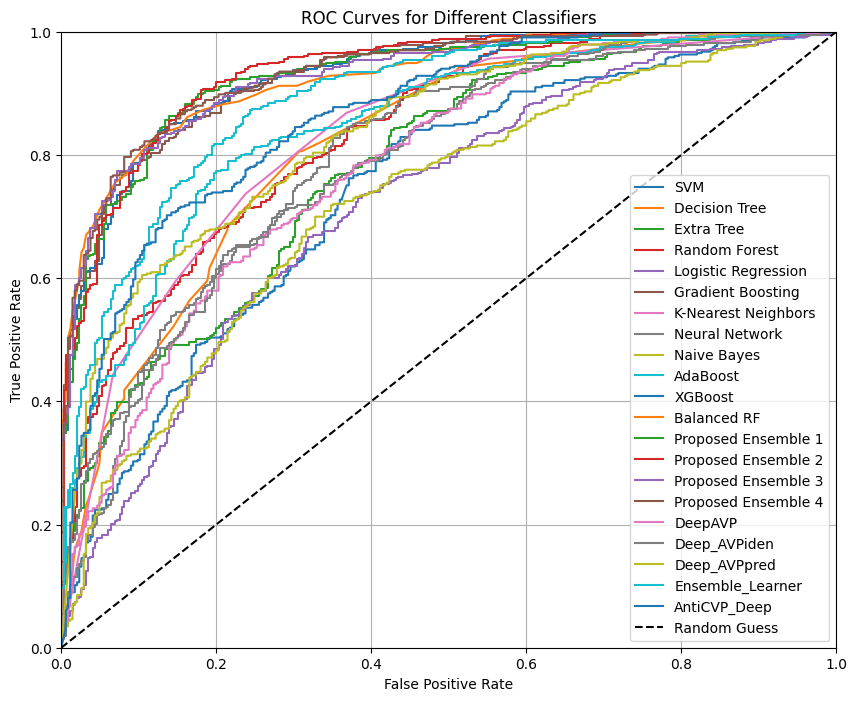

In [20]:
# Plot all ROC curves in a single plot
Rocsaved = plt.figure(figsize=(10, 8))
for name, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f'{name}')

# Plot the random guess line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Set the axis limits to start from (0, 0)
plt.xlim(0, 1)
plt.ylim(0, 1)

# Set the labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Classifiers')
plt.legend(loc='lower right')
plt.grid()

# Save the ROC curve figure
Rocsaved.savefig('ROC Curve.png', format='png', dpi=600, bbox_inches="tight")
plt.show()